# Data Preparation & Machine Learning for eBay Shill Bidding data
<b>by Victor Ferreira Silva<br>January 2023</b>
* [Introduction](#Introduction)
* [Data preparation](#DataPreparation)
    * [Data characterisation](#DataCharact)    
    * [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    * [Data cleaning](#DataCleaning)
    * [Feature engineering](#FeatureEngineering)
    * [Data scaling](#DataScaling)
* Dimensionality reduction
    * Principal Component Analysis (PCA)
    * Linear Discriminant Analysis (LDA)
* Machine Learning
    * Clustering algorithms
    * Classification algorithms
* Conclusion
* References

[SBD Dataset Web Page](https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset)

## <a id="Introduction"></a>Introduction ##
The ability to predict normal and abnormal bidding behavior of eBay users can help companies identify scams and other undesirable users on the platform. The Shill Bidding Dataset (SBD) consists of eBay auctions that have various features, including auction duration, bidder tendency and class. The goal of this report is to apply supervised and unsupervised machine learning techniques to the data set after properly preparing and characterizing it. To improve the results, scaling and feature reduction methods were used, and the performance and accuracy of the applied machine learning methods were compared. At the end of the report, the supervised and unsupervised methods that performed optimally on this dataset were identified. 

## Data preparation<a id="DataPreparation"></a>

In [118]:
# Imports and configurations
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Data characterisation<a id="DataCharact"></a> 
Data characterization involves summarizing the various features and characteristics present in a dataset through preprocessing. This process typically involves using statistical measures to introduce the data to the viewer, as well as visualizing it using graphs such as bar charts and scatter plots.

In [58]:
# loading the original dataset
df = pd.read_csv('Shill Bidding Dataset.csv')

In [60]:
df.head(5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [77]:
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.000000
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000


Upon initial examination, the SBD dataset contains 6321 observations with 13 features. The first three columns represent the record ID, auction, and bidder. According to the Pandas `info()` method, all columns except the bidder ID are numeric. The `.isnull().sum()` method returns a series with the number of missing values in each column of the dataframe. Both methods indicates the complete absence of missing values.

Also, the `describe()` method provides some general descriptive statistics for the data. Apparently, the data has undergone some pre-processing, as the range of auction duration is from 0 to 10 and the range of all other numerical features is from 0 to 1. Finally, duplicated values were not found, as it can be seen on the following line.

In [80]:
df.duplicated().any()

False

### Exploratory Data Analysis<a id="ExploratoryDataAnalysis"></a> 
According to the pie chart below, only 10.7% (674 observations) of the biddings on SBD are deemed abnormal.

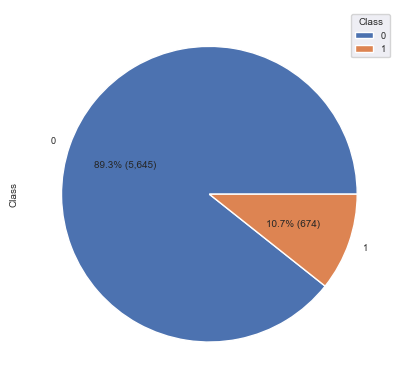

In [78]:
def custom_autopct(pct):
    return f"{pct:.1f}% ({int(pct * sum(df['Class'].value_counts()) / 100):,})"

df['Class'].value_counts().plot(kind='pie', autopct=custom_autopct)

plt.legend(title='Class')
plt.show()

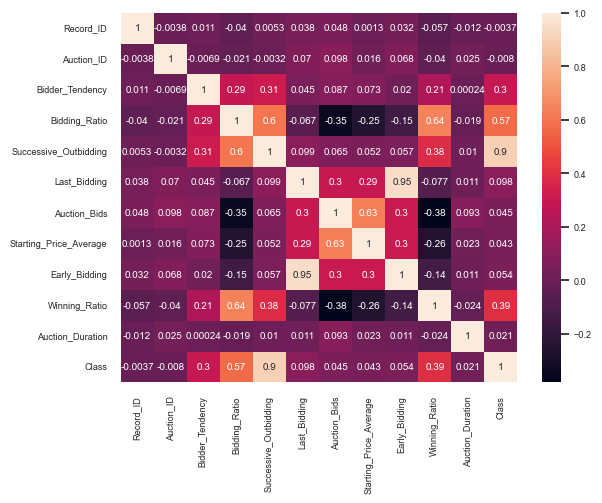

In [81]:
# Computing the correlations
corr = df.corr()
sns.set(font_scale=0.6)
sns.heatmap(corr, annot=True)
plt.show()

The heatmap above shows the correlation matrix for all numerical features in a single graph. The positive correlation between early and last bidding features is notorious. Another noticeable correlations are the negative one between the winning ratio and auction bids and the positive one between sucessive outbidding and class.

In addition to this, the histograms below reveal a distinct contrast in the distribution of Auction and Record IDs. The x-axis of the Auction ID histogram is shorter due to the presence of multiple instances of many auctions in the dataset. In contrast, the Record ID histogram exhibits a degree of uniformity, although not perfectly uniform, indicating the lack of multiple observations with the same ID

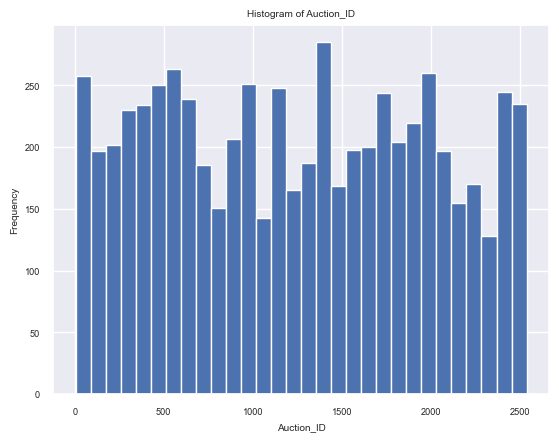

In [57]:
column = 'Auction_ID'
df[column].plot(kind='hist', bins=30)
plt.title('Histogram of {}'.format(column))
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

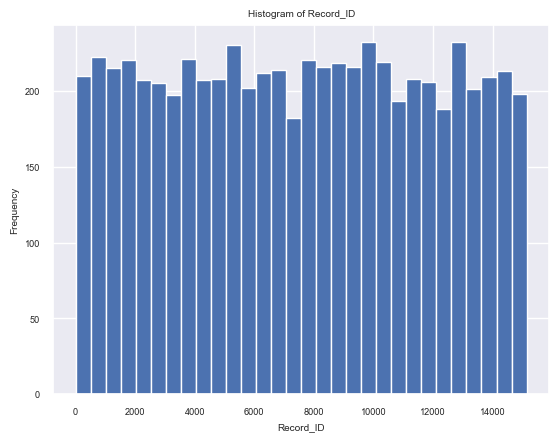

In [82]:
column = 'Record_ID'
df[column].plot(kind='hist', bins=30)
plt.title('Histogram of {}'.format(column))
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

The following boxplot illustrates the distribution of several numerical features with values ranging from 0 to 1. These 8 features are depicted in grouped boxplots as it is an effective way to visualize multiple distributions in a single graph, particularly when the y-axis range is consistent across all features. This plot provides valuable information, including the distribution of observations, quartile range including the median, and minimum and maximum values, which depict the range.

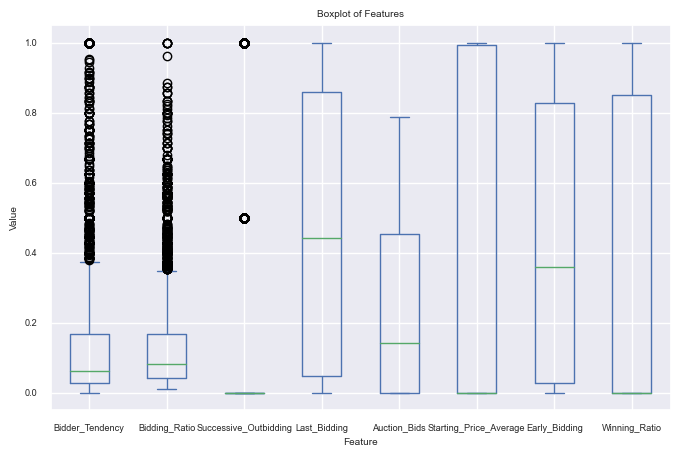

In [72]:
columns = ['Bidder_Tendency','Bidding_Ratio','Successive_Outbidding','Last_Bidding','Auction_Bids',
 'Starting_Price_Average','Early_Bidding','Winning_Ratio']

df[columns].plot(kind='box', figsize=(8, 5))
plt.title('Boxplot of Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

Finally, we have a simple histogram for Auction Duration, which was analysed separetely as it has a distinct range (from 1 to 10). It only reveals the presence of 5 distinct values which may indicate the availability of predetermined auction duration options offered by the platform to sellers.

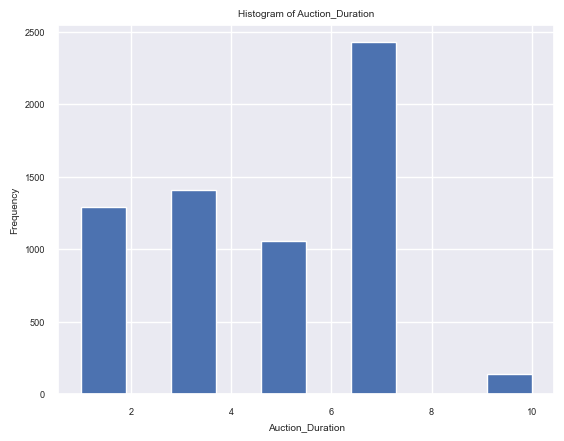

In [74]:
column = 'Auction_Duration'
df[column].plot(kind='hist', bins=10)
plt.title('Histogram of {}'.format(column))
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

### Data cleaning<a id="DataCleaning"></a> 
As the series do not present any missing or duplicated data, it was decided to continue the interactions with the original dataset.

### Feature engineering<a id="FeatureEngineering"></a> 
Feature engineering is an essential part of preparing data for machine learning modeling. It involves using various techniques, such as mathematical transformations, to modify the feature space in order to improve model performance. A Machine Learning expert is responsible for determining which features are relevant and should be included in the analysis.

One common first step in Feature Engineering is to remove unnecessary columns. In this case, the first three columns contain IDs that do not contribute to the analysis and can be removed. This process often involves trial and error, and requires careful judgement to ensure that the most useful features are retained.

In [90]:
df_feat = df.drop(columns=['Record_ID', 'Auction_ID', 'Bidder_ID'])
df_feat.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


After combining the information from columns `Last_Bidding` and `Early_Bidding`, a new column `bidding_diff` has been created by calculating the difference between the early and last bidding prices. This new column replaces the original columns. 

When calculating the `bidding_diff` feature, 25 negative values were found. This was surprising as it implies that the final bidding price was lower than the initial bidding price in these cases. It may be necessary to investigate further to determine the cause of these unexpected results.

In [100]:
df_feat['bidding_diff'] = df_feat.apply(lambda row: row['Last_Bidding'] - row['Early_Bidding'], axis=1)
df_feat_diff = df_feat.drop(columns=['Last_Bidding', 'Early_Bidding'])
df_feat_diff.describe().T

,count,mean,std,min,25%,50%,75%,max
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000e+00,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,1.176471e-02,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000e+00,0.000000,0.000000,0.000000,1.000000
Auction_Bids,6321.0,0.231606,0.255252,0.000000e+00,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000e+00,0.000000,0.000000,0.993593,0.999935
Winning_Ratio,6321.0,0.367731,0.436573,0.000000e+00,0.000000,0.000000,0.851852,1.000000
Auction_Duration,6321.0,4.615093,2.466629,1.000000e+00,3.000000,5.000000,7.000000,10.000000
Class,6321.0,0.106787,0.308867,0.000000e+00,0.000000,0.000000,0.000000,1.000000
bidding_diff,6321.0,0.032437,0.120192,-1.000000e-10,0.000000,0.000000,0.000069,0.987086


In [99]:
# counting negative Bidding Difference
negative_bidding_diff_count = df_feat_diff.loc[df_feat_diff['bidding_diff'] < 0].count()
print(negative_bidding_diff_count)

Bidder_Tendency           25
Bidding_Ratio             25
Successive_Outbidding     25
Auction_Bids              25
Starting_Price_Average    25
Winning_Ratio             25
Auction_Duration          25
Class                     25
bidding_diff              25
dtype: int64


### Data Scaling <a id="DataScaling"></a> 
Different orders of magnitude in the data can affect the results of machine learning algorithms. Standardization and normalization are commonly used scaling methods, but it is important to choose a method that preserves the impact of the outliers on the output of the machine learning algorithm. 

To ensure that the auction duration variable does not disproportionately impact the model compared to the other features, a `MinMaxScaler` was adopted, so that it falls within the same range as the other metrics, that is, between 0 and 1. Despite Bidding difference column (which has a few negative values), all features are within this same range. Since the features of the dataset do not have a large range or different orders of magnitude, and because the presence of outliers is important for the analysis, further data scaling is not necessary.

In [120]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_duration = scaler.fit_transform(df_feat_diff[['Auction_Duration']])
df_scaled = df_feat_diff
df_scaled['Auction_Duration'] = scaled_duration
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000e+00,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,1.176471e-02,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000e+00,0.000000,0.000000,0.000000,1.000000
Auction_Bids,6321.0,0.231606,0.255252,0.000000e+00,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000e+00,0.000000,0.000000,0.993593,0.999935
Winning_Ratio,6321.0,0.367731,0.436573,0.000000e+00,0.000000,0.000000,0.851852,1.000000
Auction_Duration,6321.0,0.401677,0.274070,0.000000e+00,0.222222,0.444444,0.666667,1.000000
Class,6321.0,0.106787,0.308867,0.000000e+00,0.000000,0.000000,0.000000,1.000000
bidding_diff,6321.0,0.032437,0.120192,-1.000000e-10,0.000000,0.000000,0.000069,0.987086
